In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
library(harmony)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Loading required package: Rcpp



In [2]:
beta <- readRDS("/gpfs/commons/groups/zhu_lab/nattada/data/BetaCellDifferentiationProject/Deep/newpipeline/Seurat/SubsetSeurat_merged_beta.rds")
beta

An object of class Seurat 
50972 features across 248609 samples within 1 assay 
Active assay: RNA (50972 features, 10000 variable features)
 2 dimensional reductions calculated: pca, umap

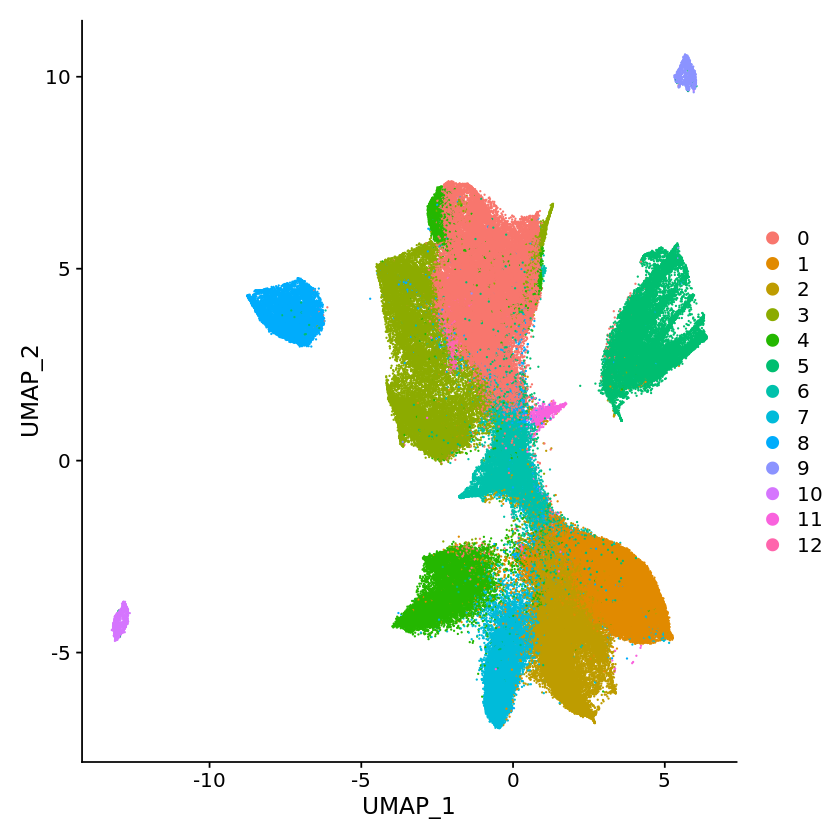

In [3]:
DimPlot(beta, raster=FALSE, reduction = "umap")

In [4]:
head(beta)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.1,seurat_clusters,target,stage,RNA_snn_res.0.5,RNA_snn_res.0.25
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>
obj1:01:A1:B5:12,beta,290,268,0.6896552,2,2,H3K27ac,D41,1,2
obj1:01:A1:BF:08,beta,248,235,0.4032258,15,0,H3K27ac,D15,0,0
obj1:01:A1:BI:08,beta,404,353,0.0000000,5,4,H3K27ac,D15,7,4
obj1:01:A1:BI:09,beta,236,217,0.0000000,4,7,H3K27ac,D22,3,7
obj1:01:A1:BQ:09,beta,512,443,0.7812500,4,7,H3K27ac,D22,8,7
obj1:01:A1:BQ:11,beta,232,221,0.4310345,3,6,H3K27ac,D41,3,6
obj1:01:A1:C2:06,beta,341,301,0.0000000,7,3,H3K27ac,D12,10,3
obj1:01:A1:CJ:10,beta,284,262,1.7605634,11,1,H3K27ac,D22,1,1
obj1:01:A1:DA:09,beta,418,378,0.0000000,8,8,H3K27ac,D22,12,8


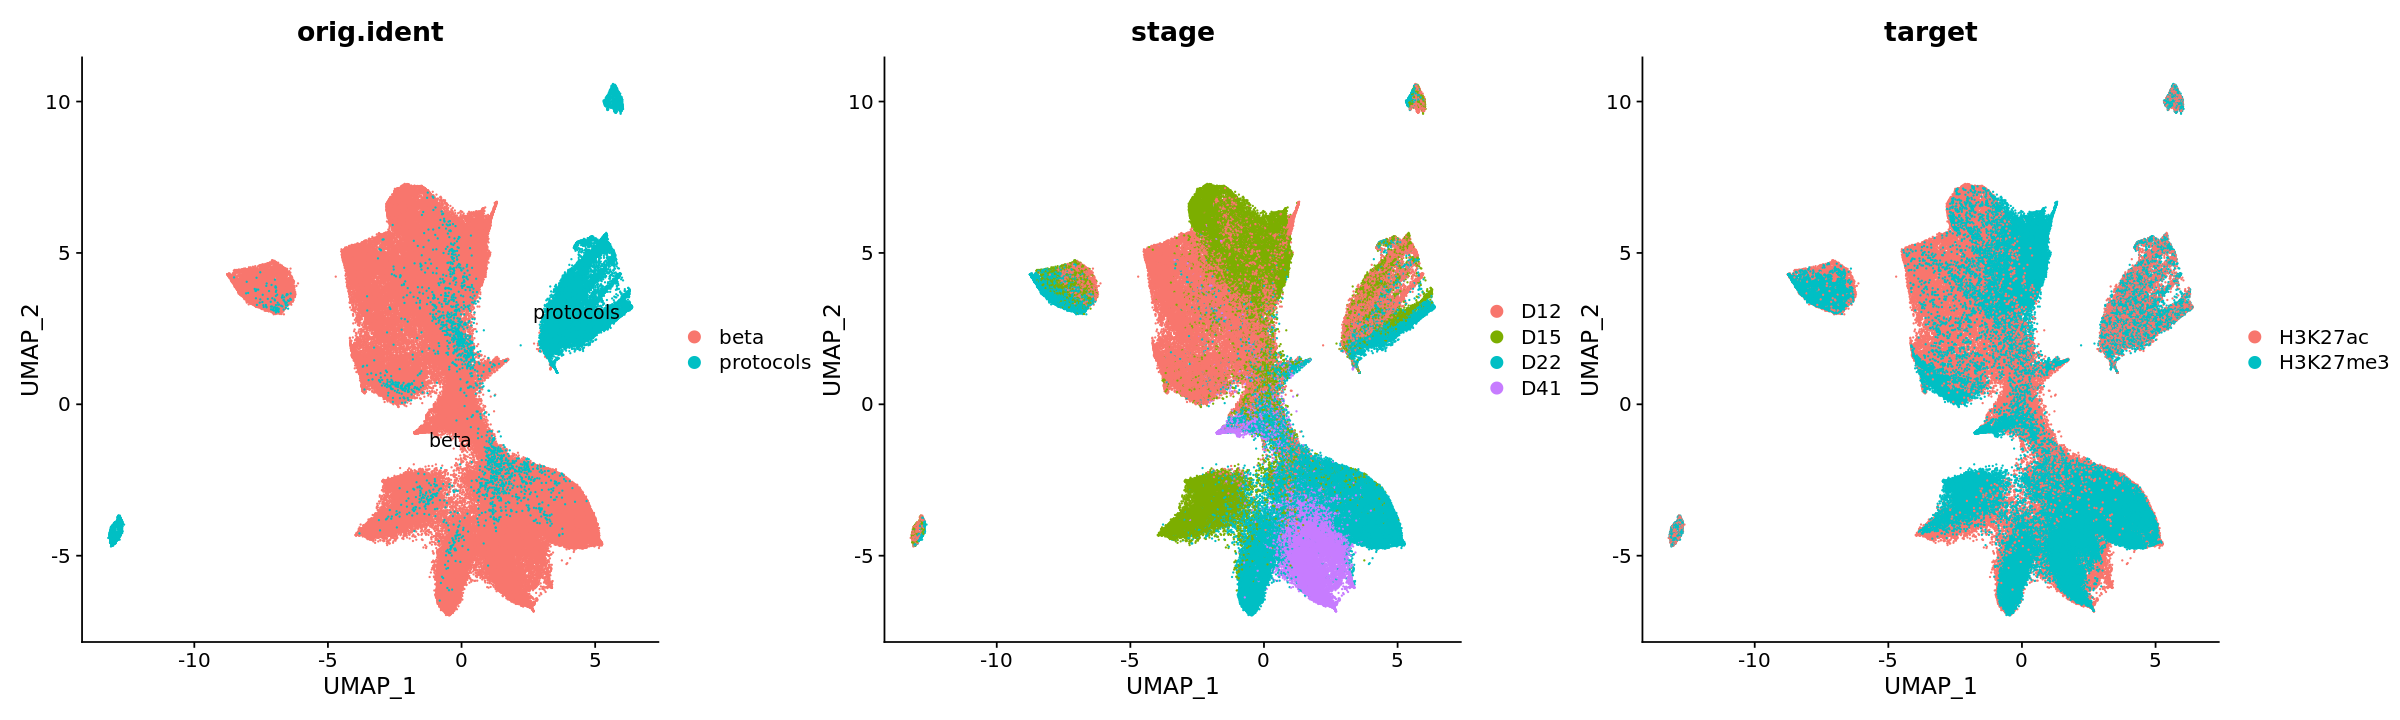

In [5]:
p1 <- DimPlot(beta, raster=FALSE, group.by="orig.ident", label=T)
p2 <- DimPlot(beta, raster=FALSE, group.by="stage")
p3 <- DimPlot(beta, raster=FALSE, group.by="target")
options(repr.plot.width=20, repr.plot.height=6) ### resize plot 
p1+p2+p3

In [8]:
library_target<-paste0(beta$orig.ident,"_",beta$target);head(library_target)

[1] "beta_H3K27ac" "beta_H3K27ac" "beta_H3K27ac" "beta_H3K27ac" "beta_H3K27ac"
[6] "beta_H3K27ac"

In [9]:
beta$library_target<-library_target

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 12430450)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 12430450)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 12430450)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 12430450)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 12430450)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony converged after 9 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


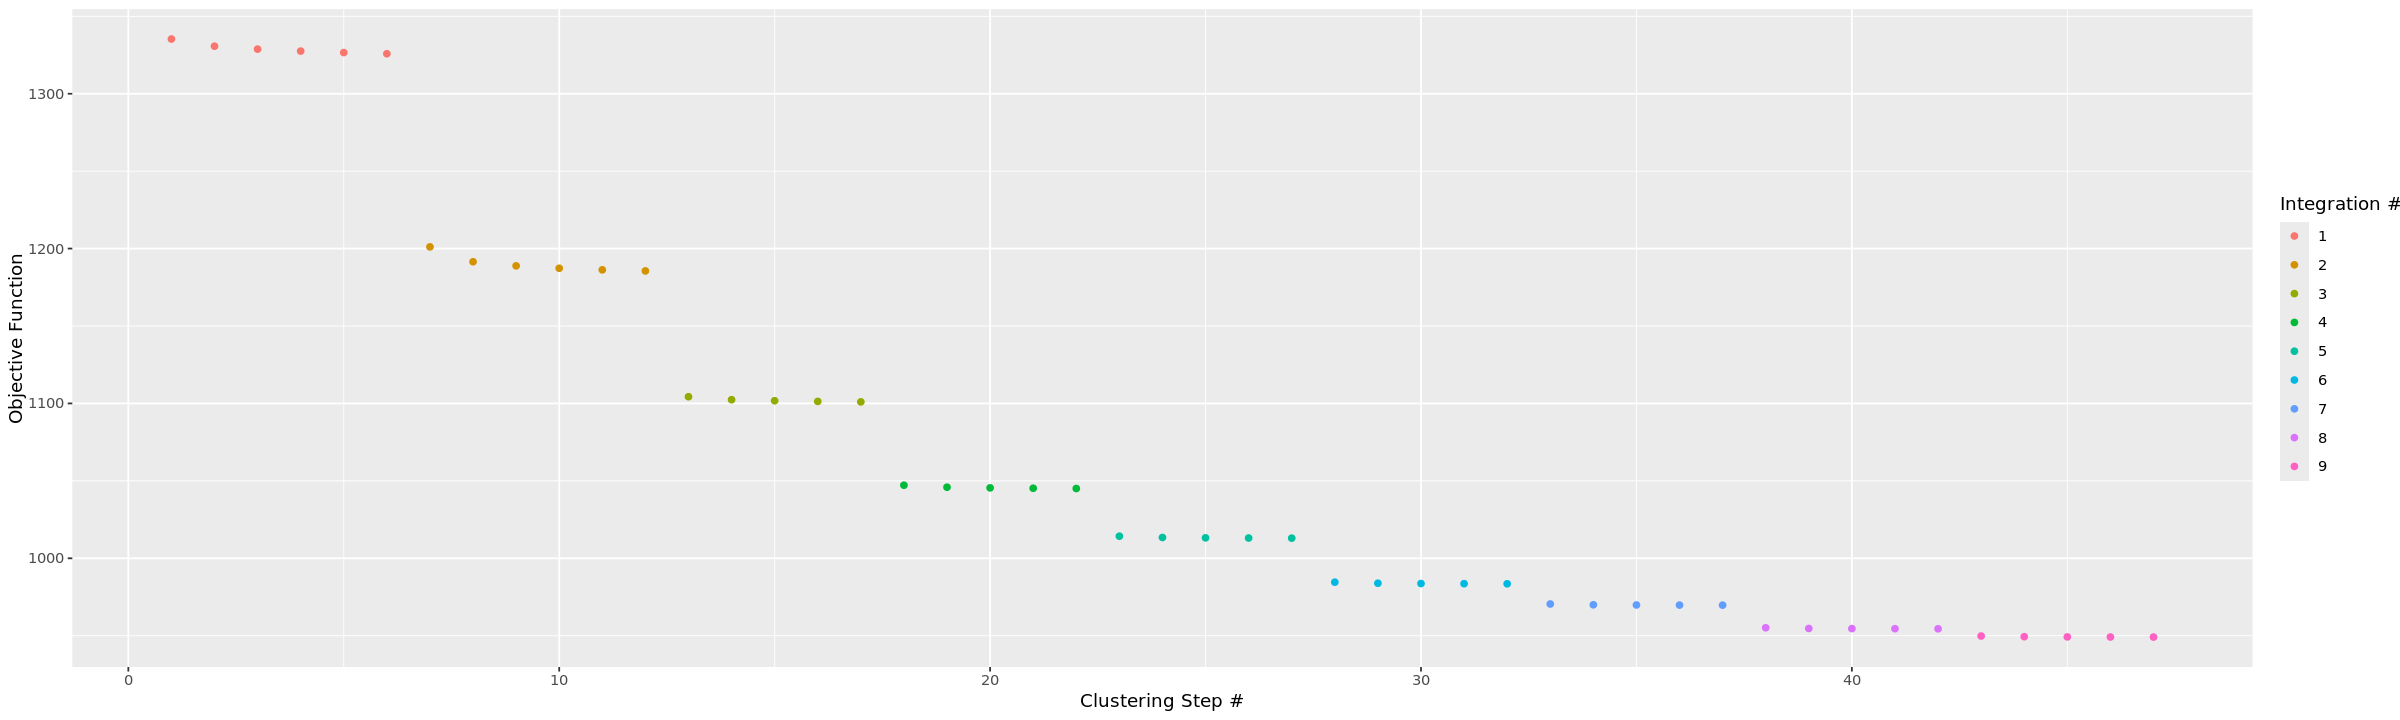

In [10]:
beta <- beta %>% 
    RunHarmony("library_target", plot_convergence = TRUE)

In [11]:
pc.use=c(1:25)

### clustering & run UMAP
beta <- beta %>% 
    RunUMAP(reduction = "harmony", dims = pc.use) %>% 
    FindNeighbors(reduction = "harmony", dims = pc.use) %>% 
    FindClusters(resolution = 0.5) %>% 
    identity()

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:59:31 UMAP embedding parameters a = 0.9922 b = 1.112

09:59:31 Read 248609 rows and found 25 numeric columns

09:59:31 Using Annoy for neighbor search, n_neighbors = 30

09:59:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:00:14 Writing NN index file to temp file /scratch/RtmpKGWq4W/file1e30712944ed

10:00:14 Searching Annoy index using 1 thread, search_k = 3000

10:02:44 Annoy recall = 100%

10:02:45 Commencing smooth kNN distance calibration using 1 thread
 with target n_neigh

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 248609
Number of edges: 6022765

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9337
Number of communities: 43
Elapsed time: 137 seconds


20 singletons identified. 23 final clusters.



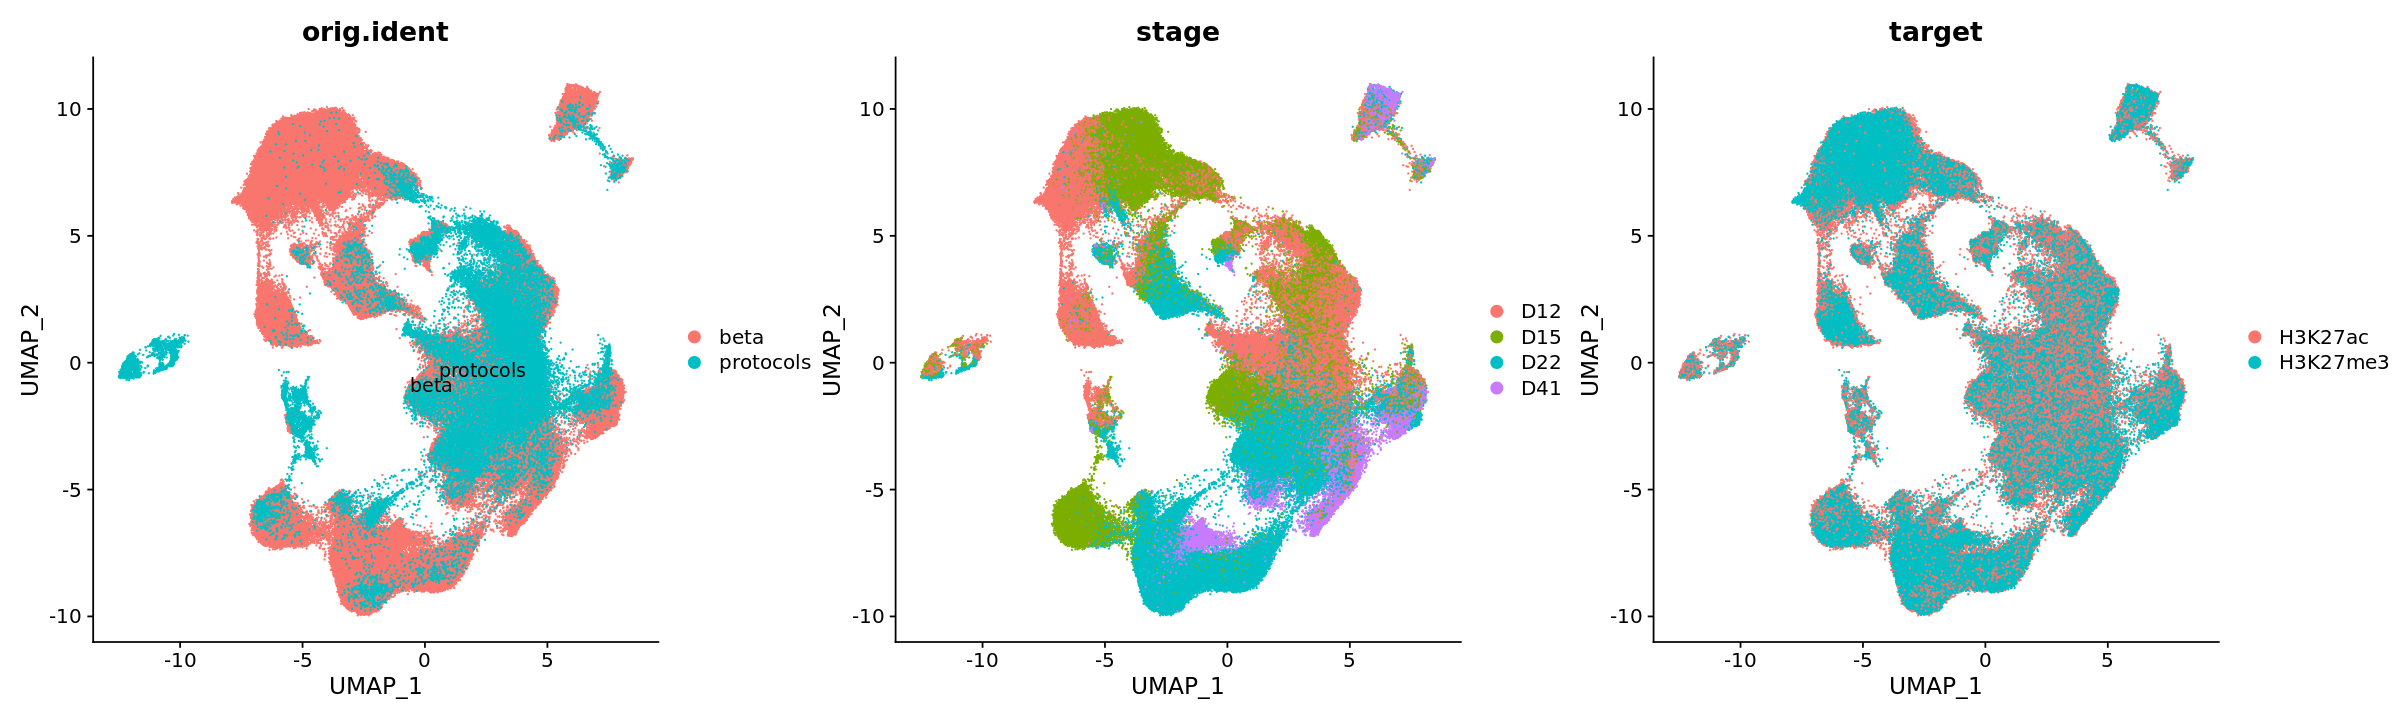

In [13]:
p1 <- DimPlot(beta, raster=FALSE, group.by="orig.ident", label=T)
p2 <- DimPlot(beta, raster=FALSE, group.by="stage")
p3 <- DimPlot(beta, raster=FALSE, group.by="target")
p4 <- DimPlot(beta, raster=FALSE, group.by="seurat_clusters")
options(repr.plot.width=20, repr.plot.height=6) ### resize plot 
p1+p2+p3

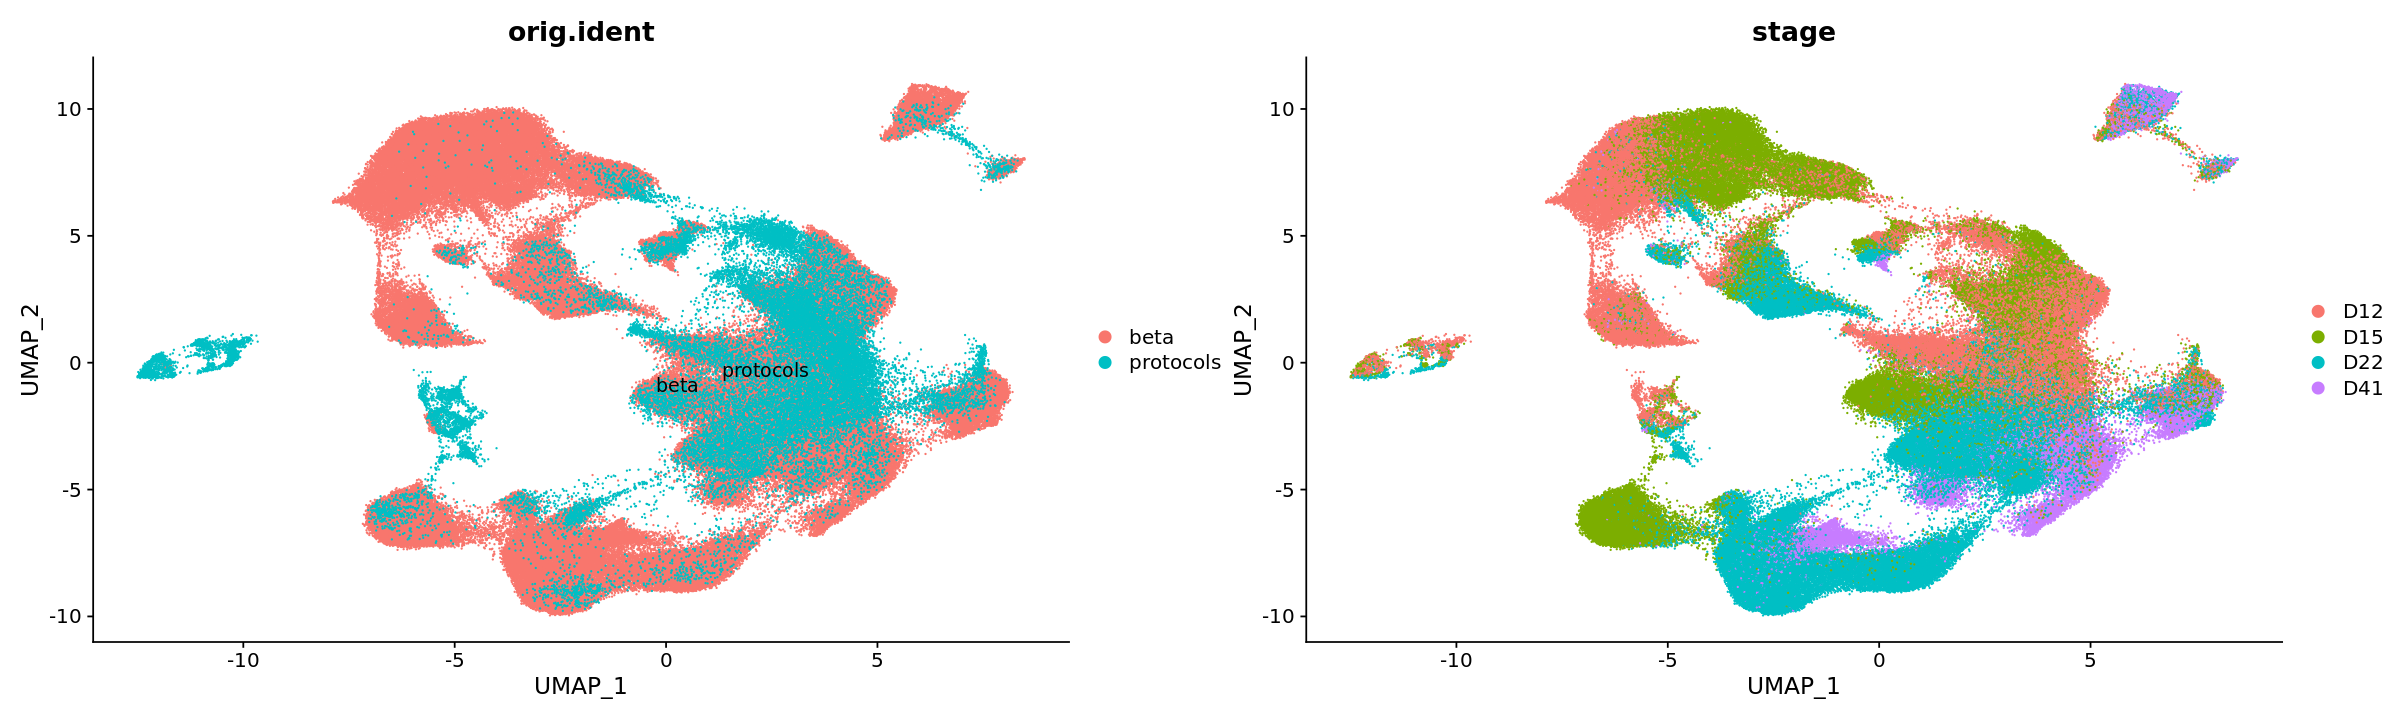

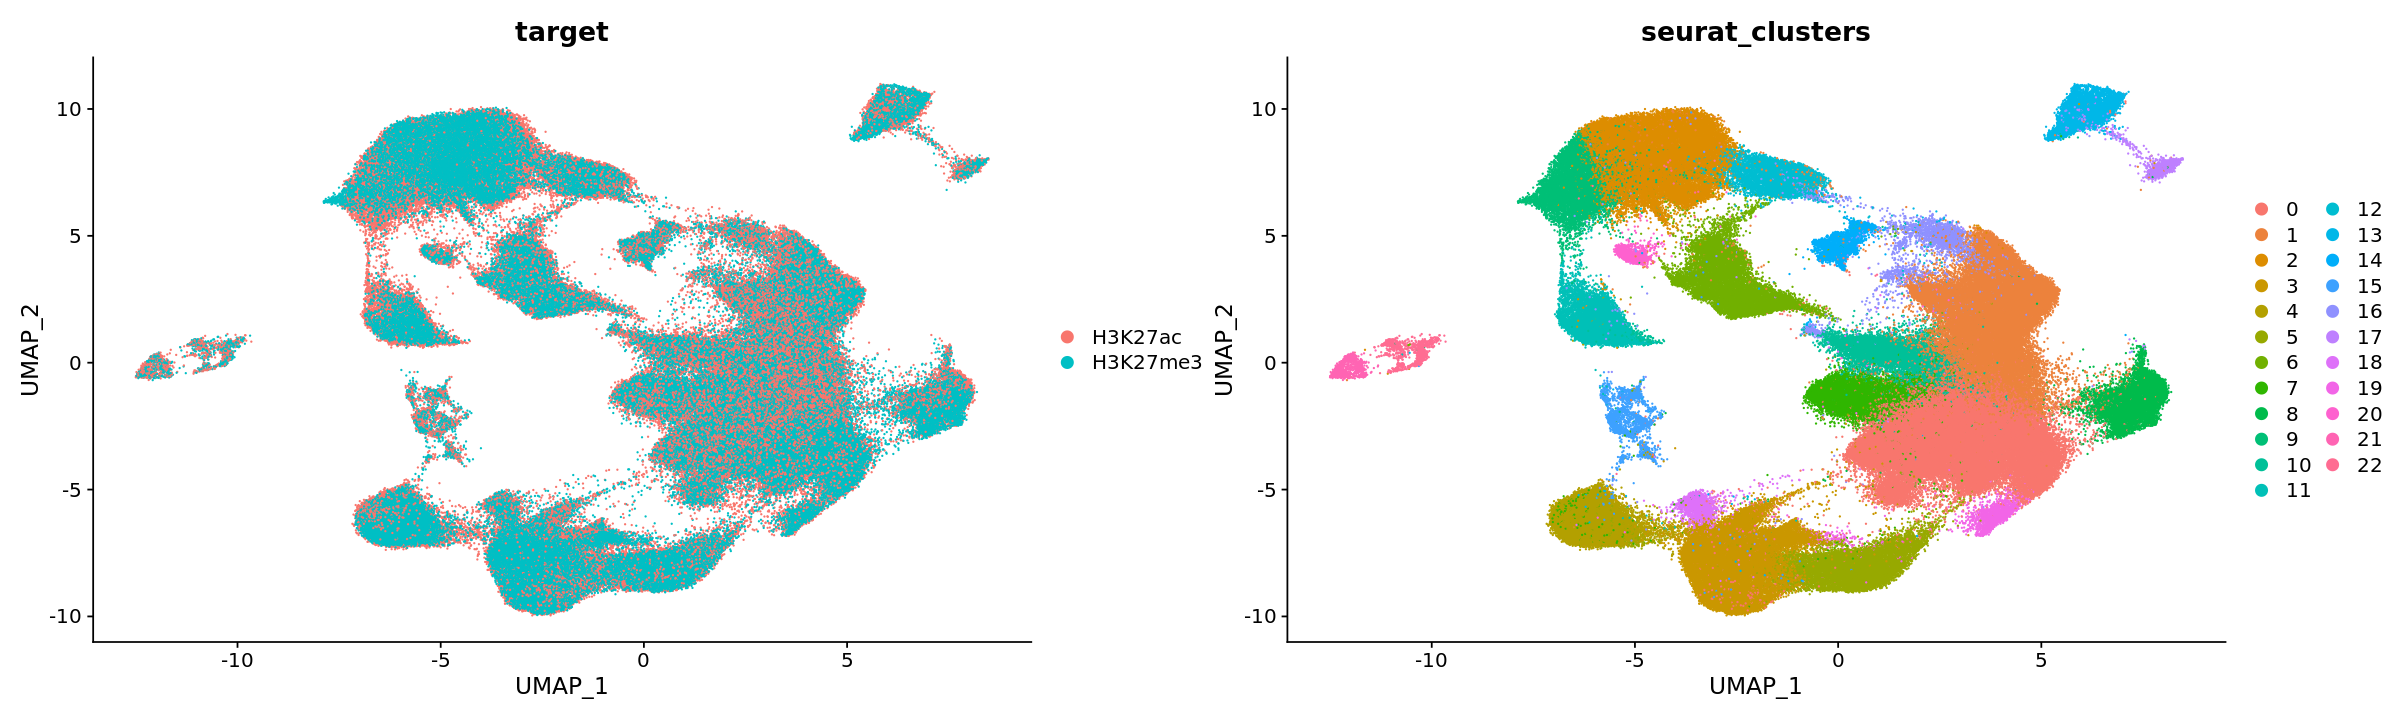

In [14]:
p1+p2
p3+p4

In [16]:
table(beta$orig.ident)


     beta protocols 
   218679     29930 